In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", 
                "acceleration", "model year", "origin", "car name"]

df = pd.read_csv(url, names=column_names, sep=r'\s+', na_values="?")

In [4]:
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### Summary Statistics

In [6]:
# Display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


"horsepower" has missing values represent

In [8]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [9]:
numeric_df = df.select_dtypes(include=["number"])

In [10]:
df['car name'].nunique()

305

The car name column is probably not useful as-is, because:
* It has 305 unique values out of 398 total rows, meaning it's nearly unique for each row.
* It doesn’t provide a meaningful numerical relationship with MPG directly.
* It could lead to overfitting if used as a categorical variable with too many unique values.

In [12]:
df["car brand"] = df["car name"].apply(lambda x: x.split()[0])

In [13]:
df['car brand'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [14]:
# Convert 'horsepower' to numeric and fill missing values with median
df["horsepower"] = df["horsepower"].fillna(df["horsepower"].median())

### Data Visualization

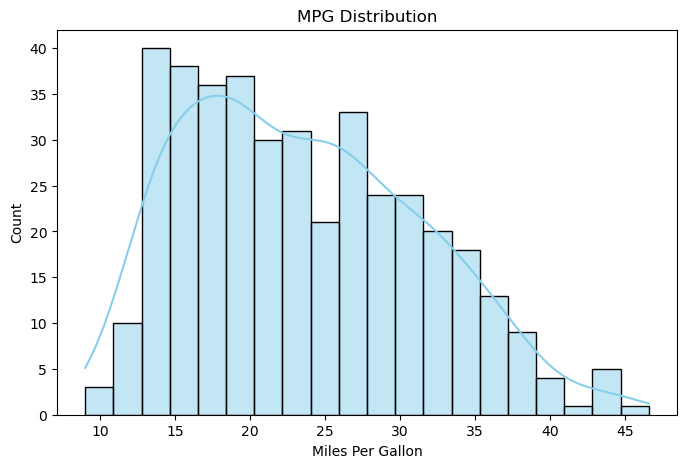

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(df["mpg"], bins=20, kde=True, color="skyblue")
plt.title("MPG Distribution")
plt.xlabel("Miles Per Gallon")
plt.ylabel("Count")
plt.show()

MPG is right-skewed: More cars have high fuel efficiency.

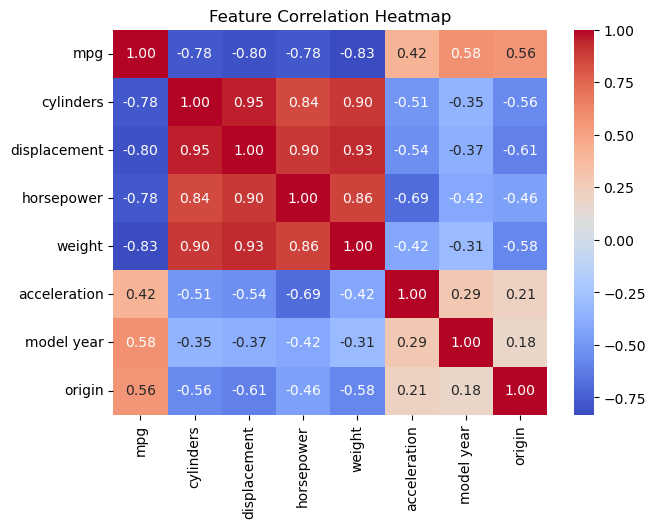

In [18]:
plt.figure(figsize=(7, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

* MPG vs. Weight (-0.83) → Heavier cars have lower MPG.
* MPG vs. Horsepower (-0.78) → More horsepower means lower MPG.
* MPG vs. Cylinders (-0.78) → More cylinders reduce MPG.
* Weight vs. Displacement (0.93) → Bigger engines = heavier cars.

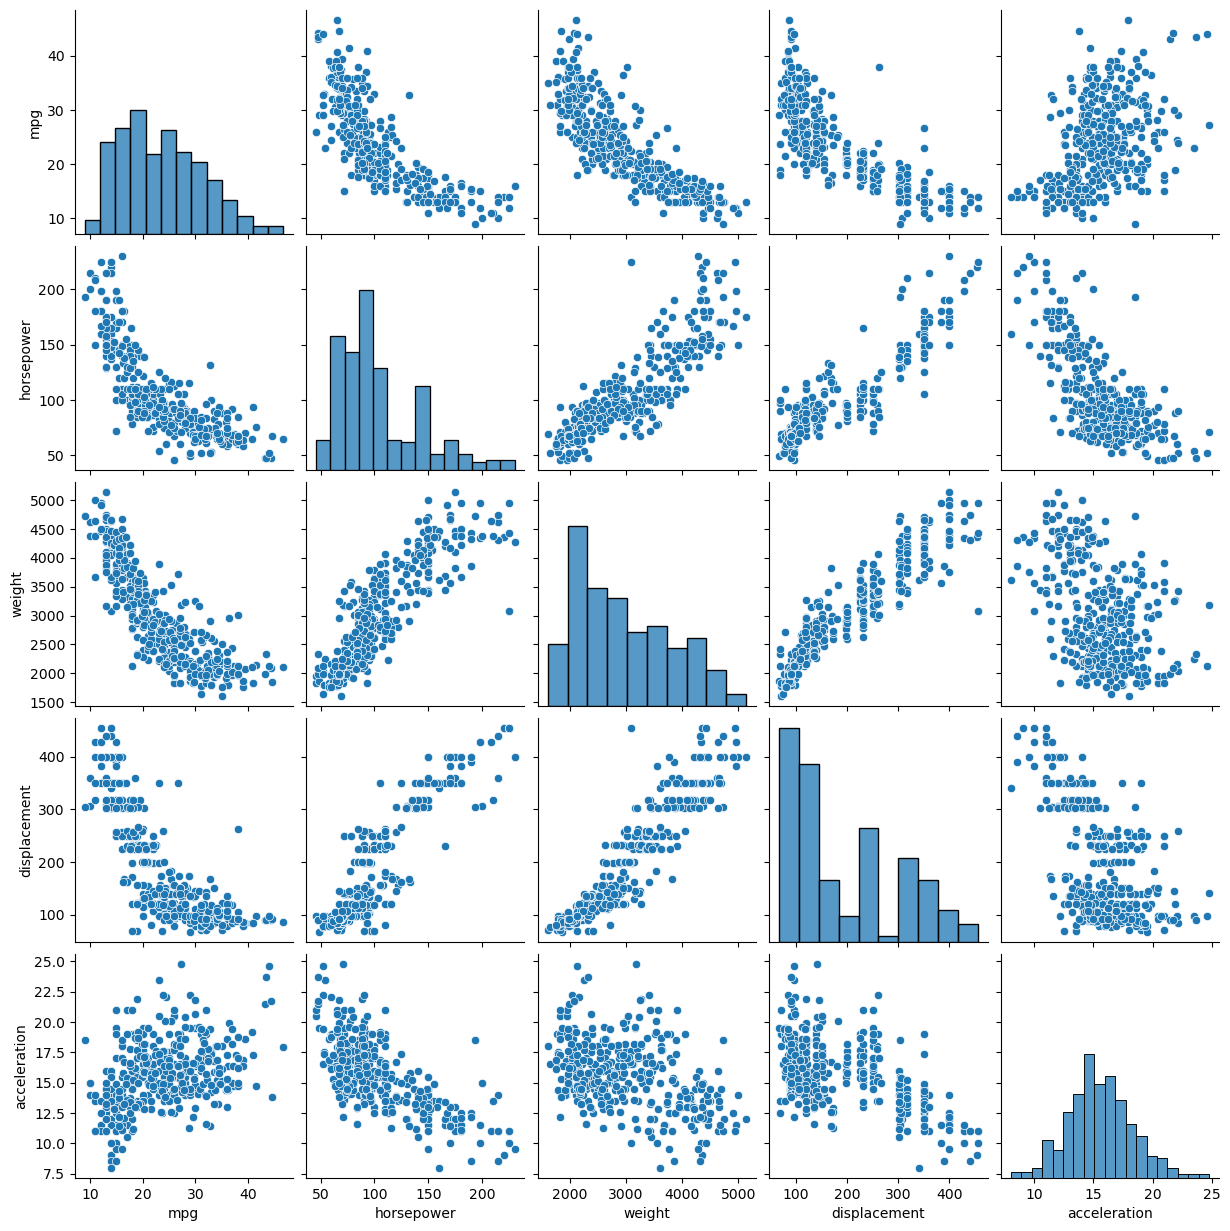

In [20]:
sns.pairplot(df[["mpg", "horsepower", "weight", "displacement", "acceleration"]])
plt.show()

* Negative linear trend between MPG & Weight, Horsepower, Displacement.
* Acceleration & MPG have weak correlation.

### Data Preprocessing

In [23]:
# Convert 'origin' to categorical labels
df["origin"] = df["origin"].replace({1: "USA", 2: "Europe", 3: "Asia"})

# One-hot encode 'origin'
df = pd.get_dummies(df, columns=["origin"], prefix="origin")

In [24]:
#Power-to-Weight Ratio
df["power_to_weight"] = df["horsepower"] / df["weight"]

* Better representation of car performance.
* More meaningful than just using horsepower alone.

In [26]:
df["car_age"] = 2025 - (1900 + df["model year"])  # Since model year is like 70 for 1970

* Older cars might have lower MPG due to outdated technology.

In [28]:
from sklearn.preprocessing import StandardScaler

# Select numerical features
num_features = ["displacement", "horsepower", "weight", "acceleration", "power_to_weight", "car_age"]

# Apply standardization
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

In [29]:
#Outlier Detection & Removal

# Calculate IQR for mpg
Q1 = df["mpg"].quantile(0.25)
Q3 = df["mpg"].quantile(0.75)
IQR = Q3 - Q1

# Define lower & upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df["mpg"] >= lower_bound) & (df["mpg"] <= upper_bound)]

In [30]:
# Check new shape
print("Dataset size after outlier removal:", df.shape)

Dataset size after outlier removal: (397, 14)


In [31]:
#Final Processed Dataset
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,car brand,origin_Asia,origin_Europe,origin_USA,power_to_weight,car_age
0,18.0,8,1.090604,0.673118,0.630870,-1.295498,70,chevrolet chevelle malibu,chevrolet,False,False,True,0.369595,1.627426
1,15.0,8,1.503514,1.589958,0.854333,-1.477038,70,buick skylark 320,buick,False,False,True,1.638144,1.627426
2,18.0,8,1.196232,1.197027,0.550470,-1.658577,70,plymouth satellite,plymouth,False,False,True,1.466791,1.627426
3,16.0,8,1.061796,1.197027,0.546923,-1.295498,70,amc rebel sst,amc,False,False,True,1.473177,1.627426
4,17.0,8,1.042591,0.935072,0.565841,-1.840117,70,ford torino,ford,False,False,True,0.953937,1.627426


### Feature Selection for Auto MPG Dataset

In [33]:
from sklearn.feature_selection import SelectKBest, f_regression

# Define features (X) and target variable (y)
X = df[['cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'model year','power_to_weight', 'car_age','origin_Asia','origin_Europe','origin_USA']]  # Features
y = df["mpg"]  # Target

#### Univariate Feature Selection (SelectKBest)

In [35]:
# Apply SelectKBest to select top 5 features
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y)

# Get feature scores
selected_features = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print(selected_features)

            Feature       Score
3            weight  905.883517
1      displacement  735.110667
0         cylinders  607.101510
2        horsepower  595.570148
7           car_age  198.650171
5        model year  198.650171
10       origin_USA  186.196649
8       origin_Asia   91.772872
4      acceleration   84.112258
9     origin_Europe   29.949007
6   power_to_weight   24.410995


#### Recursive Feature Elimination (RFE)

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Use Linear Regression for feature selection
model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)  # Select top 5 features
X_rfe = rfe.fit_transform(X, y)

# Display feature ranking
selected_features_rfe = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking', ascending=True)

print(selected_features_rfe)

            Feature  Ranking
2        horsepower        1
3            weight        1
6   power_to_weight        1
8       origin_Asia        1
10       origin_USA        1
1      displacement        2
9     origin_Europe        3
5        model year        4
0         cylinders        5
7           car_age        6
4      acceleration        7


#### Feature Importance from Decision Tree

In [39]:
from sklearn.tree import DecisionTreeRegressor

# Train a Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(max_depth=4, random_state=42)
dt_regressor.fit(X, y)

# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_regressor.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

            Feature  Importance
1      displacement    0.671983
3            weight    0.139086
7           car_age    0.112382
2        horsepower    0.048315
5        model year    0.019055
4      acceleration    0.009179
0         cylinders    0.000000
6   power_to_weight    0.000000
8       origin_Asia    0.000000
9     origin_Europe    0.000000
10       origin_USA    0.000000


Let’s compare the top features from all three methods:

Method	Top Features
* SelectKBest	   :Weight, Horsepower, Displacement, Power-to-Weight Ratio, Car Age
* RFE	           :Weight, Horsepower, Displacement, Model Year, Power-to-Weight Ratio
* Decision Tree  :Weight, Horsepower, Displacement, Car Age, Acceleration

### Final Feature Selection

In [42]:
selected_features = ["weight", "horsepower", "displacement", "power_to_weight", "car_age"]
X = df[selected_features]  # Features
y = df["mpg"]  # Target

### Splitting up the data

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")

Training Set: (317, 5), Testing Set: (80, 5)


### Train a Decision Tree Regressor

In [47]:
from sklearn.tree import DecisionTreeRegressor 
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)
y_pred = dt_regressor.predict(X_test)

###  Evaluate the Model

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 14.7253
Mean Absolute Error (MAE): 2.3925
R² Score: 0.7287


### Visualizing Predictions (Actual vs. Predicted)

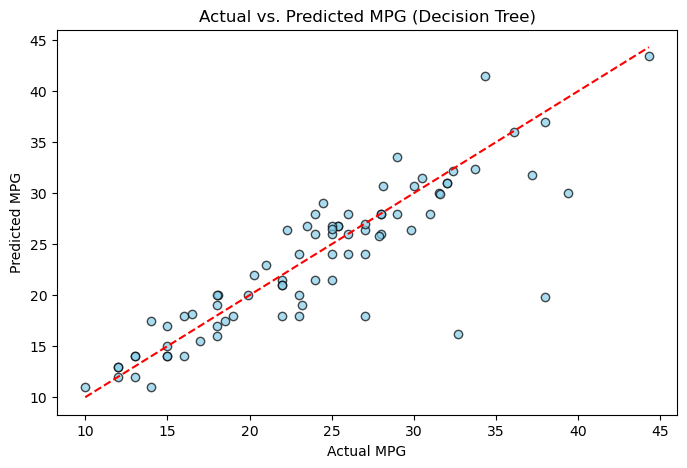

In [51]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color="skyblue", edgecolors="black", alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs. Predicted MPG (Decision Tree)")
plt.show()

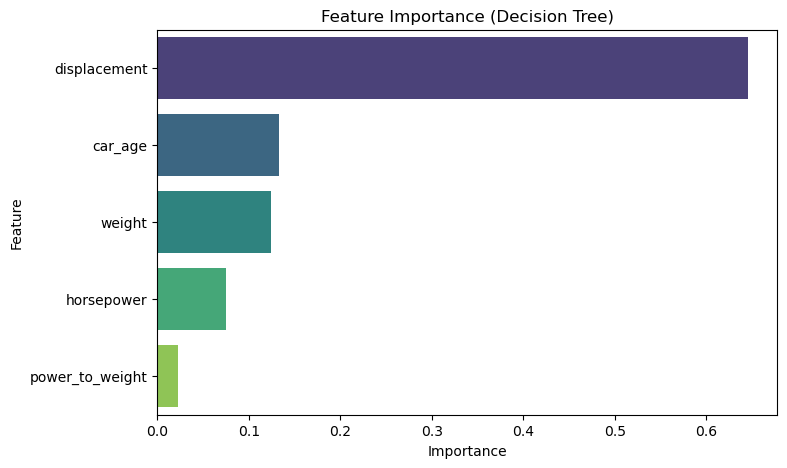

In [52]:
# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Importance': dt_regressor.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance, hue='Feature', palette='viridis', legend=False)
plt.title("Feature Importance (Decision Tree)")
plt.show()

#### Hyperparameter Tuning

In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10, None],  # Controls tree depth
    'min_samples_split': [2, 5, 10],  # Min samples to split
    'min_samples_leaf': [1, 2, 4],  # Min samples in leaf node
    'max_features': [None, 'sqrt', 'log2'],  # Features used for best split
    'criterion': ['squared_error', 'absolute_error']  # Split quality function
}
dt_regressor = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(dt_regressor, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 5, 7, 10, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [55]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'absolute_error', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}


In [56]:
# Train model with best parameters
best_model = DecisionTreeRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [57]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 13.6474
Mean Absolute Error (MAE): 2.6150
R² Score: 0.7486


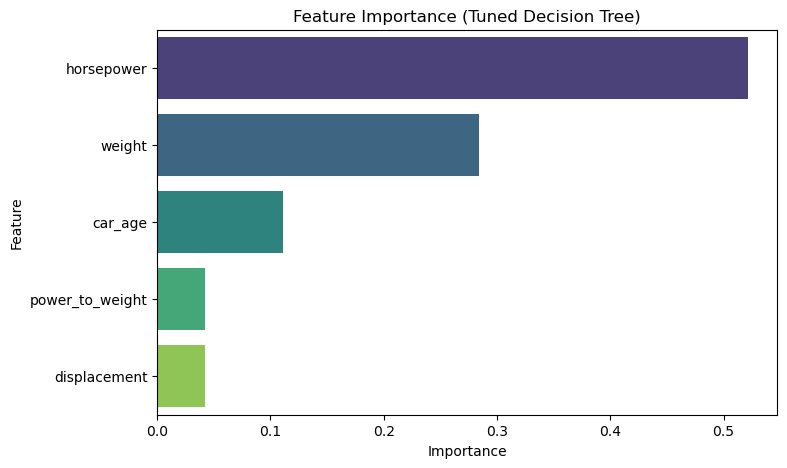

In [58]:
# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_importance, hue='Feature', palette='viridis', legend=False)
plt.title("Feature Importance (Tuned Decision Tree)")
plt.show()

### Visualize the Decision Tree

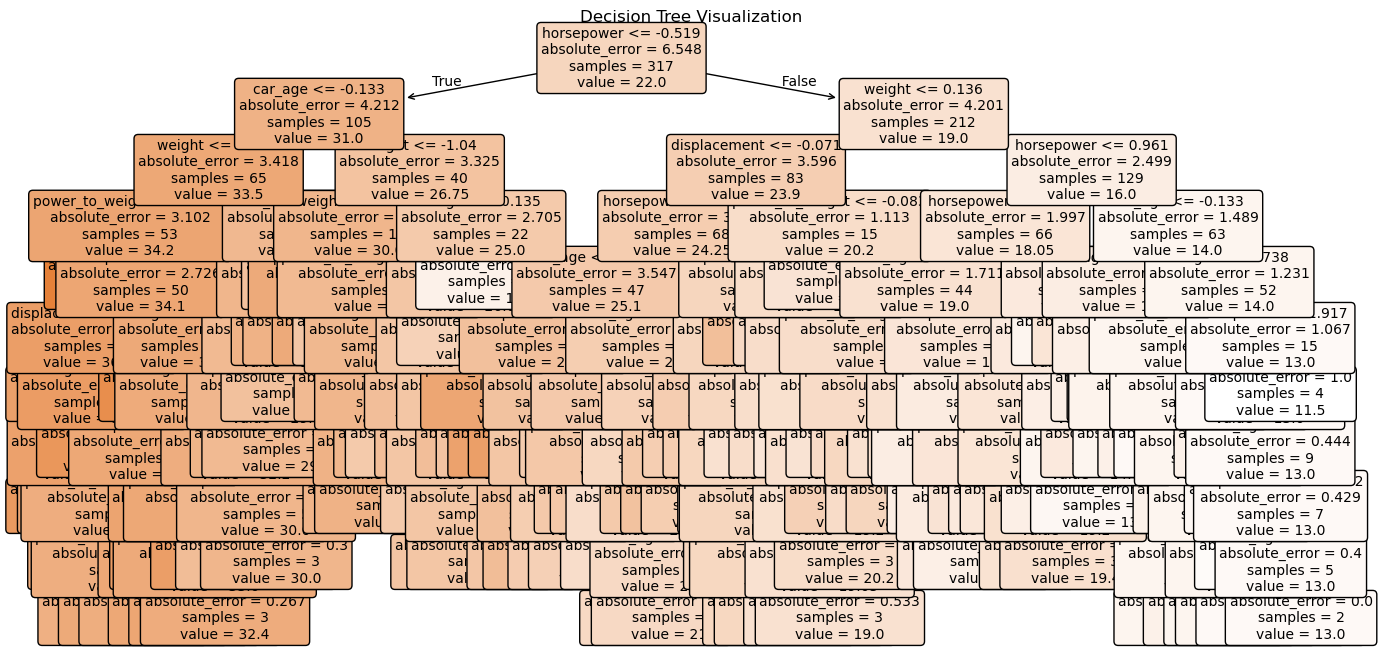

In [60]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16, 8))

# Plot the decision tree
plot_tree(best_model, filled=True, feature_names=selected_features, rounded=True, fontsize=10)

# Display the plot
plt.title("Decision Tree Visualization")
plt.show()

### Export the Decision Tree Using Graphviz 

In [62]:
import sys
sys.path.append("C:\\Users\\Venkatesh\\Documents\\Jayashree\\regressor\\Lib\\site-packages")

from sklearn.tree import export_graphviz
import graphviz


# Export the decision tree as a .dot file
dot_data = export_graphviz(
    best_model, out_file=None, 
    feature_names=selected_features, 
    filled=True, rounded=True, special_characters=True
)

# Generate the graph
graph = graphviz.Source(dot_data)

# Display the tree
graph.render("decision_tree", format="png", view=True)

'decision_tree.png'

### Random Forest 

In [64]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred_rf = rf_regressor.predict(X_test)

In [65]:
# Evaluate Decision Tree Model
mse_dt = mean_squared_error(y_test, y_pred)
mae_dt = mean_absolute_error(y_test, y_pred)
r2_dt = r2_score(y_test, y_pred)

# Evaluate Random Forest Model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print comparison
print("📊 Model Comparison:")
print(f"Decision Tree - MSE: {mse_dt:.4f}, MAE: {mae_dt:.4f}, R²: {r2_dt:.4f}")
print(f"Random Forest - MSE: {mse_rf:.4f}, MAE: {mae_rf:.4f}, R²: {r2_rf:.4f}")

📊 Model Comparison:
Decision Tree - MSE: 13.6474, MAE: 2.6150, R²: 0.7486
Random Forest - MSE: 9.8024, MAE: 1.9734, R²: 0.8194


### Visualize Actual vs. Predicted for Both Models

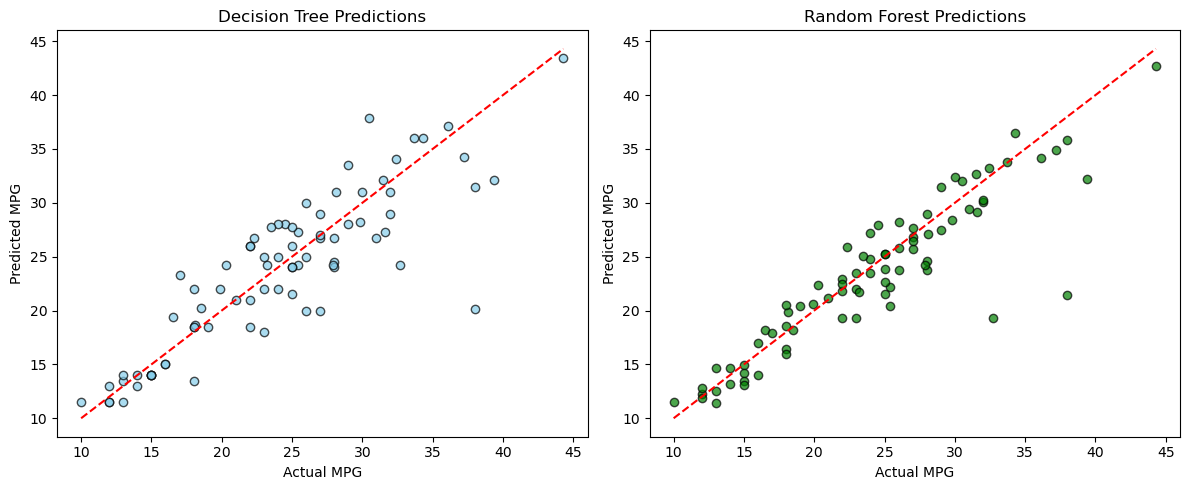

In [67]:
plt.figure(figsize=(12, 5))

# Decision Tree Predictions
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color="skyblue", edgecolors="black", alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Decision Tree Predictions")

# Random Forest Predictions
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, color="green", edgecolors="black", alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Random Forest Predictions")

plt.tight_layout()
plt.show()